Importing dataset from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
import keras as ks

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os


Initialize the initial learning rate, number of epochs to train for, and batch size

In [ ]:
INIT_LR=1e-4
EPCHS = 300
BS = 32

Labelling of the dataset

In [ ]:
import cv2,os
data_path='/content/drive/My Drive/FaceDataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


Image Sizing

In [ ]:
img_size=224
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            resized=cv2.resize(gray,(img_size,img_size))

            data.append(resized)
            target.append(label_dict[category])


        except Exception as e:
            print('Exception:',e)


In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

ValueError: ignored

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [ ]:
  import numpy as np

  data=np.load('data.npy')
  target=np.load('target.npy')



In [ ]:
from __future__ import print_function, division
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob

In [ ]:
inception = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

outputs = inception.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False

model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_190 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_190[0][0]']             
 Normalization)                 )                                                           

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
train_data1,test_data1,train_target1,test_target1=train_test_split(data,target,test_size=0.4)

In [ ]:
train_data2,test_data2,train_target2,test_target2=train_test_split(data,target,test_size=0.3)

In [ ]:
train_data3,test_data3,train_target3,test_target3=train_test_split(data,target,test_size=0.2)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20


ValueError: ignored

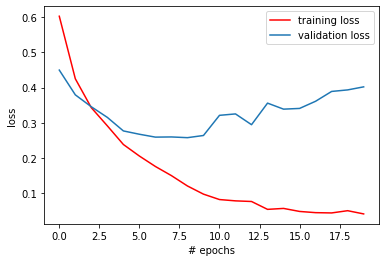

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

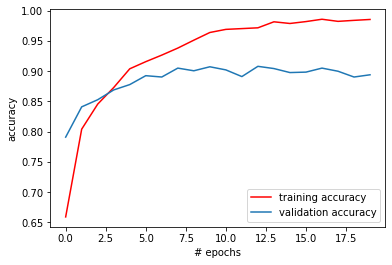

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

24/24 [==============================] - 0s 20ms/step - loss: 0.3676 - accuracy: 0.8940
[0.36761897802352905, 0.8940397500991821]


In [ ]:
print(model.evaluate(test_data1,test_target1))

95/95 [==============================] - 2s 20ms/step - loss: 0.1035 - accuracy: 0.9695
[0.10350286960601807, 0.9695364236831665]


In [ ]:
print(model.evaluate(test_data2,test_target2))

71/71 [==============================] - 1s 20ms/step - loss: 0.1286 - accuracy: 0.9651
[0.1286100149154663, 0.9651213884353638]


In [ ]:
print(model.evaluate(test_data3,test_target3))

48/48 [==============================] - 1s 20ms/step - loss: 0.1103 - accuracy: 0.9715
[0.11033034324645996, 0.9715231657028198]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('model-010.model')


labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
import cv2
import numpy as np
datatest= '/content/drive/My Drive/test'
categories=os.listdir(datatest)
print(categories)

['1.jpg', '0.jpg', '2-with-mask.jpg', '3-with-mask.jpg', '2.jpg', '3.jpg', '1-with-mask.jpg', '0-with-mask.jpg']


In [ ]:
def prepare(filepath):
  img_size=100
  image_array=cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  test_image=cv2.resize(gray,(img_size,img_size))
  return test_image.reshape( -1, img_size, img_size, 1)


In [ ]:
model = load_model("model-010.model")

prediction = model.predict([prepare("1.jpg")])
print(prediction)

[[0. 1.]]
